# 生成死亡概率模型

In [35]:
a = [0]*0
a

[]

In [1]:
ax_path = "./data/lc_ax_female.csv"
bx_path = "./data/lc_bx_female.csv"
kt_path = "./data/lc_kt_female.csv"
path = [ax_path, bx_path, kt_path]

import Prob 
death_Prob = Prob.D_Prob()
death_Prob.read_abk(path)

import ST
import numpy as np
np.random.seed(8)  # 设置固定的随机数种子


/home/hhf/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def MC(M:int, x0, T0, lifespan):
    T = lifespan - x0
    p = 1
    buff_day = 10*21*12 # 为了更精细划分S_t
    N = buff_day * T * p  # 按年积累,希望应该是buff_day*T*p
    S0 = 1.0
    r = 0.05
    l =  0.001146
    g = 0
    sigma = 0.2

    unit_P_cache = {}  # 用于存储unit_P的结果
    result = []
    avg_res = []
    fee_result = []
    ave = []

    for j in range(1, M + 1):
        t_all, int_item = ST.intg_item(N, T, S0, r, l, g, sigma)
        intern_res = 0  # 内部的离散积分值，这里以年为单位
        int_death_payoff = 0
        for i in range(0, T * p):
            if i not in unit_P_cache:
                unit_P_cache[i] = death_Prob.unit_P(x0, T0, i, p)
            intern_res += int_item[int((i + 1) * buff_day) - 1] * unit_P_cache[i]
            int_death_payoff += np.exp(-l*t_all[int((i+1)*buff_day) - 1])*unit_P_cache[i]
        intern_res = intern_res + int_item[-1] * death_Prob.accu_live(x0, T0, T, 0)
        fee = 1 - int_death_payoff - death_Prob.accu_live(x0, T0, T, 0)*np.exp(-l*T)
        result.append(intern_res)
        ave_j = np.mean(result)
        ave.append(ave_j)
        fee_result.append(fee)
    avg_res = np.mean(result)
    fee_avg_res = np.mean(fee) 
    

    return avg_res, fee_avg_res, ave

In [3]:
# def MC(M, x0, T0, lifespan, l):
#     '''
#     M : 蒙特卡洛模拟次数
#     x0 : 投保的年龄
#     T0 : 投保的公元年份
#     lifespan : 预期最长的寿命
#     l : 死亡率
#     '''
#     T = lifespan - x0
#     p = 1
#     buff_day = 10*21*12
#     N = buff_day * T * p
#     S0 = 1.0
#     r = 0.05
#     g = 0.2
#     sigma = 0.2

# # 在第一次蒙特卡洛迭代前初始化缓存
#     unit_P_cache = {}  # 用于存储unit_P的结果

#     result = []
#     avg_res = []
#     fee_result = []
#     for j in range(M):
#         t_all, int_item = ST.intg_item(N, T, S0, r, l, g, sigma)

#         intern_res = 0
#         int_death_payoff = 0
#         for i in range(T * p):
#             # 检查是否已经计算过这个值
#             if i not in unit_P_cache:
#                 # 如果没有缓存，计算并存入缓存
#                 unit_P_cache[i] = death_Prob.unit_P(x0, T0, i, p)
#             intern_res += int_item[int((i + 1) * buff_day) - 1] * unit_P_cache[i]
#             # intern_res += int_item[int((i+1)*buff_day) - 1] * death_Prob.unit_P(x0, T0, i, p)
#             int_death_payoff += np.exp(-l*t_all[int((i+1)*buff_day) - 1])*unit_P_cache[i]
#         intern_res = intern_res + int_item[-1] * death_Prob.accu_live(x0, T0, T, 0)
#         fee = 1 - int_death_payoff - death_Prob.accu_live(x0, T0, T, 0)*np.exp(-l*T)
#         result.append(intern_res)
#         fee_result.append(fee)
#     avg_res = np.mean(result)
#     fee_avg_res = np.mean(fee)
        
#     return avg_res, fee_avg_res


In [4]:
# def MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l):
#     '''
#     M : 蒙特卡洛模拟次数
#     x0 : 投保的年龄
#     T0 : 投保的公元年份
#     lifespan : 预期最长的寿命
#     l : 死亡率
#     '''
#     T = lifespan - x0 - k
#     N = buff_day * T * p
#     sigma = 0.2

#     interval_P_cache = {}
#     terminal_live_cache = {}
#     result = []
#     avg_res = []
#     ave = []
#     fee_result = []

#     for i in range(0, (lifespan - x0) * p):
#             # print(i)
#             if i not in terminal_live_cache:
#                 terminal_live_cache[i] = death_Prob.interval_terminal_live(x0, T0, i, lifespan - x0, p)
#             print(terminal_live_cache)
#             for j in range(i + 1, (lifespan - x0) * p + 1):
#                 if i == 0:
#                     interval_P_cache[(i, j-1)] = death_Prob.unit_P(x0, T0, j-1, p)
#                 elif (i, j-1) not in interval_P_cache:
#                     interval_P_cache[(i, j-1)] = death_Prob.interval_death_P(x0, T0, i-1, j-1, p)
#             print(interval_P_cache)

#     for _ in range(M):
#         t_all, int_item = ST.intg_item(N, T, S0, r, l, g, sigma)
#         intern_res = 0  # 内部的离散积分值，这里以年为单位
#         int_death_payoff = 0
#         for w in range(T * p):
#             intern_res += int_item[int((w + 1) * buff_day) - 1] * interval_P_cache[(k, w+k)]
#             print("interval_P_cache",interval_P_cache[(k, w+k)])
#             int_death_payoff += np.exp(-l*t_all[int((w+1)*buff_day) - 1])*interval_P_cache[(k, w+k)]
#         intern_res = intern_res + int_item[-1] * terminal_live_cache[k]
#         print("terminal_live_cache", terminal_live_cache[k])
#         fee = 1 - int_death_payoff - terminal_live_cache[k]*np.exp(-l*T)

#         result.append(intern_res)
#         ave_j = np.mean(result)
#         ave.append(ave_j)###用于画图，看结果稳不稳定
#         fee_result.append(fee)

#     avg_res = np.mean(result)
#     fee_avg_res = np.mean(fee) 

#     return avg_res, fee_avg_res, ave


In [5]:
#2020年50岁的投保人，合同截至在其95岁
avg_res, fee_avg_res, ave = MC(6000, 50, 2020, 75)


KeyboardInterrupt: 

In [ ]:
print(avg_res, fee_avg_res)

0.027142249787233206 0.027356810969937473


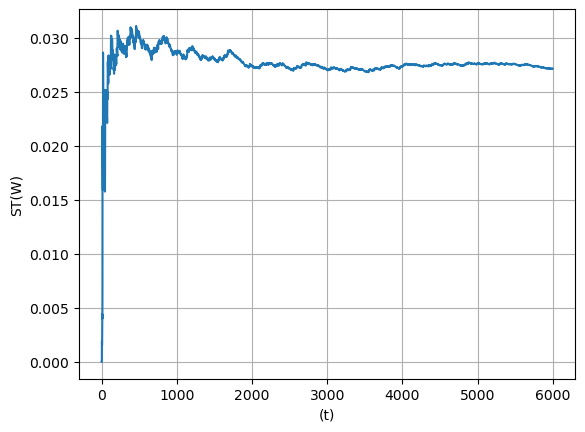

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(ave))), ave)
plt.xlabel('(t)')
plt.ylabel('ST(W)')
plt.grid(True)
plt.show()

# 蒙特卡洛

In [1]:
ax_path = "./data/lc_ax_female(1).csv"
bx_path = "./data/lc_bx_female(1).csv"
kt_path = "./data/lc_kt_female(1).csv"
path = [ax_path, bx_path, kt_path]

import Prob 
death_Prob = Prob.D_Prob()
death_Prob.read_abk(path)

import ST
import numpy as np
from statistics import mean

np.random.seed(8)  # 设置固定的随机数种子


/home/hhf/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
import os

lifespan =92
x0 = 67
T0 = 2020
p = 1

terminal_live_cache_file = f'./data/terminal_live_cache_{x0}.csv'
interval_P_cache_file = f'./data/interval_P_cache_{x0}.csv'

# 尝试从CSV文件读取数据
if os.path.exists(terminal_live_cache_file):
    terminal_live_cache = pd.read_csv(terminal_live_cache_file, index_col=0).to_dict()['Value']
else:
    terminal_live_cache = {}

if os.path.exists(interval_P_cache_file):
    interval_P_cache_df = pd.read_csv(interval_P_cache_file)
    interval_P_cache = {(row['Start'], row['End']): row['Value'] for index, row in interval_P_cache_df.iterrows()}
else:
    interval_P_cache = {}

for i in range(0, (lifespan - x0) * p):
    if i == 0:
        terminal_live_cache[i] = death_Prob.accu_live(x0, T0, lifespan - x0, 0)
    elif i not in terminal_live_cache:
        terminal_live_cache[i] = death_Prob.interval_terminal_live(x0, T0, i, lifespan - x0, p)
    for j in range(i + 1, (lifespan - x0) * p + 1):
        if i == 0:
            interval_P_cache[(i, j-1)] = death_Prob.unit_P(x0, T0, j-1, p)
        elif (i, j-1) not in interval_P_cache:
            # print(i, j-1)
            interval_P_cache[(i, j-1)] = death_Prob.interval_death_P(x0, T0, i-1, j-1, p)

pd.DataFrame.from_dict(terminal_live_cache, orient='index', columns=['Value']).to_csv(terminal_live_cache_file)
interval_P_cache_df = pd.DataFrame([(key[0], key[1], value) for key, value in interval_P_cache.items()], columns=['Start', 'End', 'Value'])
interval_P_cache_df.to_csv(interval_P_cache_file, index=False)

In [3]:
def MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l):
    T = lifespan - x0 - k
    N = buff_day * T * p
    sigma = 0.2

    # 你现有的MC函数代码继续
    result = []
    avg_res = []
    ave = []
    fee_result = []

    for _ in range(M):
        t_all, int_item = ST.intg_item(N, T, S0, r, l, g, sigma)
        intern_res = 0  # 内部的离散积分值，这里以年为单位
        int_death_payoff = 0
        for w in range(T * p):
            intern_res += int_item[int((w + 1) * buff_day) - 1] * interval_P_cache[(k, w+k)]
            # print("interval_P_cache",interval_P_cache[(k, w+k)])
            int_death_payoff += np.exp(-l*t_all[int((w+1)*buff_day) - 1])*interval_P_cache[(k, w+k)]
        intern_res = intern_res + int_item[-1] * terminal_live_cache[k]
        # print("terminal_live_cache", terminal_live_cache[k])
        fee = 1 - int_death_payoff - terminal_live_cache[k]*np.exp(-l*T)

        result.append(intern_res)
        ave_j = np.mean(result)
        ave.append(ave_j)###用于画图，看结果稳不稳定
        fee_result.append(fee)

    avg_res = np.mean(result)
    fee_avg_res = np.mean(fee) 

    return avg_res, fee_avg_res, ave

In [4]:
def preliminary_search_per_i(initial_l, k, step_size, M, p, buff_day, S0, r, g, x0, T0, lifespan, max_iter=100):
    T = lifespan - x0 - k
    # l = 0.000129 * T**2 - 0.010775 * T + 0.196646
    l =  initial_l
    lower_l, upper_l = None, None  # 初始化 lower_l 和 upper_l

    # 首先减小 l 直到 fee_avg_res - avg_res[-1] 变为负值
    for _ in range(max_iter):
        print("l: ", l)
        avg_res, fee_avg_res, _ = MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l)
        print("max(exp(g*t), S_t): ", avg_res)
        print("fee_avg_res: ", fee_avg_res)
        if fee_avg_res - avg_res < 0:
            upper_l = l + step_size  # 记录这个点的前一个点为 upper_l
            break
        l -= step_size

    # 从取负值的 l 开始，反转方向，以较小的步长增加 l
    step_size /= 3  # 减小步长
    for _ in range(max_iter):
        l += step_size
        print("l: ", l)
        avg_res, fee_avg_res, _ = MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l)
        print("max(exp(g*t), S_t): ", avg_res)
        print("fee_avg_res: ", fee_avg_res)
        if fee_avg_res - avg_res > 0:
            lower_l = l - step_size  # 记录这个点的前一个点为 lower_l
            break

    # 第二轮搜索：缩小搜索范围
    new_lower_l = lower_l  # 初始化新的搜索范围
    new_upper_l = upper_l
    
    l_mid = (lower_l + upper_l) / 2  # 找到当前范围的中点
    avg_res_mid, fee_avg_res_mid, _ = MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l_mid)
    if fee_avg_res_mid - avg_res_mid > 0:
        new_upper_l = l_mid
    else:
        new_lower_l = l_mid
            

    return new_lower_l, new_upper_l


In [5]:
def fine_search_per_i(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, lower_l, upper_l, fine_step_size):
    best_l = lower_l + fine_step_size #lower_l时diff<0,所以从lower_l+fine_step_size查看diff和0的区别
    min_difference = np.inf
    found_small_diff = False  # 标记是否找到小于0.0003的差异
    
    l = lower_l + fine_step_size
    while l <= upper_l - fine_step_size:
        print("l: ", l)
        avg_res, fee_avg_res, _ = MC(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, l)
        print("max(exp(g*t), S_t): ", avg_res)
        print("fee_avg_res: ", fee_avg_res)
        difference = abs(fee_avg_res - avg_res)  # 计算差值的绝对值
        # 如果找到了小于0.0003的差异，标记为True
        if difference <0.000003:
            break
    
        if difference < 0.0003:
            found_small_diff = True
        
        # 在找到小于0.0003的差异后，如果差异又大于0.0025，结束搜索
        if found_small_diff and difference > 0.002:
            print(f"Ending search: difference increased beyond 0.0025 after finding a smaller difference.")
            break  # 结束循环
        
        # 更新最小差异和最优l
        if difference < min_difference:
            min_difference = difference
            best_l = l
            
        l += fine_step_size  # 使用非常小的步长
    
    print(f"Best l before stopping: {best_l}, Min difference before stopping: {min_difference}")
    return best_l, min_difference



In [32]:
# 初始化参数
M = 8000
x0 = 67
T0 = 2020
lifespan = 92

S0 = 1.0
p = 1
buff_day = 10*21*12
r = 0.05
g = 0
tolerance = 1e-6 
step_size = 0.0006 #preliminary_search_per_i
k = 24    ####这次想要计算出来的年龄是多少的，k = 0,1,...,24
initial_l = 0.15

best_ls = []  # 用于存储每个索引i对应的最优l值
min_differences = []  # 用于存储每个索引i对应的最小差值

print("k:", k)
lower_l, upper_l = preliminary_search_per_i(initial_l, k, step_size, M, p, buff_day, S0, r, g, x0, T0, lifespan, max_iter=100)
print(f"索引{k},的lower_l, upper_l: {lower_l}, {upper_l}")

if lower_l is not None and upper_l is not None:
    fine_step_size = 0.00001  # 精细搜索步长 
    best_l, min_difference = fine_search_per_i(M, k, p, buff_day, S0, r, g, x0, T0, lifespan, lower_l, upper_l, fine_step_size)
    best_ls.append(best_l)
    min_differences.append(min_difference)
    print(f"Index {k}: Best l value: {best_l} with minimum difference: {min_difference}")
else:
    best_ls.append(None)
    min_differences.append(None)
    print(f"Index {k}: Unable to find suitable l interval during preliminary search.")

k: 24
l:  0.15
max(exp(g*t), S_t):  0.12501591676234147
fee_avg_res:  0.1392920235749423
l:  0.1494
max(exp(g*t), S_t):  0.12639328508017006
fee_avg_res:  0.13877544383066132
l:  0.14880000000000002
max(exp(g*t), S_t):  0.12572182346669758
fee_avg_res:  0.1382585540455309
l:  0.14820000000000003
max(exp(g*t), S_t):  0.12292025796994378
fee_avg_res:  0.13774135403347054
l:  0.14760000000000004
max(exp(g*t), S_t):  0.1277813954462145
fee_avg_res:  0.13722384360828854
l:  0.14700000000000005
max(exp(g*t), S_t):  0.12289150556355148
fee_avg_res:  0.1367060225836806
l:  0.14640000000000006
max(exp(g*t), S_t):  0.12289622628899786
fee_avg_res:  0.1361878907732318
l:  0.14580000000000007
max(exp(g*t), S_t):  0.12252628951690368
fee_avg_res:  0.13566944799041414
l:  0.14520000000000008
max(exp(g*t), S_t):  0.12304454239042267
fee_avg_res:  0.13515069404858848
l:  0.1446000000000001
max(exp(g*t), S_t):  0.12310752416074512
fee_avg_res:  0.1346316287610032
l:  0.1440000000000001


KeyboardInterrupt: 